<a href="https://colab.research.google.com/github/Marcelooyola/UDAMod5/blob/main/trabajo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

# **Trabajo Final - Módulo 5 - Aprendizaje Automático - Machine Learning**

![logo](https://www.python.org/static/community_logos/python-powered-w-100x40.png)

~~~
Nombre: Marcelo
Apellido: Oyola
~~~

# **Aclaraciones previas**



*   En cada celda se indica lo solicitado.
*   Se pueden generar la cantidad de scripts necesarios.
*   Puede explicar insertando celdas de texto.
*   Para graficar se puede utilizar cualquier librería.
*   Al finalizar, descargar el archivo y entregarlo por el campus.
*   Al finalizar se debería borrar esta celda.


age: edad del cliente, valor numérico entero mayor a 18.
job: trabajo del cliente.
marital: estado civil del cliente.
education: educación alcanzada por el cliente.
default: si el cliente posee deudas.
balance: depósito del cliente en euros.
housing: propietario de inmueble o alquila.
loan: si el cliente tiene un préstamo.
contact: último contacto del cliente.
day: día del último contacto del cliente.
month: mes del último contacto el cliente.
duration: duración del último contacto del cliente.
campaign: identificación de la campaña.
pdays: dias posteriores a la campaña.
previous: números de contactos previos a la campaña.
poutcome: resultados de la campaña anterior.
y: si suscribe un depósito a plazo posterior a campaña.

# **Carga de módulos y datos necesarios**

In [1]:
import pandas as pd
import numpy as np

In [47]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# **Creación del DataFrame**

In [3]:
url="https://raw.githubusercontent.com/cristiandarioortegayubro/Maestria-Ciencia-de-Datos-UBA-FCE/main/Gestion_y_Procesamiento_BD/"
archivo="bank-full.csv"
analisis = pd.read_csv(url+archivo)
analisis.replace({"unknown": np.nan}, inplace=True)

# **Análisis Exploratorio de los datos**

## Visualización del conjunto de datos

In [4]:
analisis.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


## Tipos de datos

In [5]:
"""
age: edad del cliente, valor numérico entero mayor a 18.
job: trabajo del cliente.
marital: estado civil del cliente.
education: educación alcanzada por el cliente.
default: si el cliente posee deudas.
balance: depósito del cliente en euros.
housing: propietario de inmueble o alquila.
loan: si el cliente tiene un préstamo.
contact: último contacto del cliente.
day: día del último contacto del cliente.
month: mes del último contacto el cliente.
duration: duración del último contacto del cliente.
campaign: identificación de la campaña.
pdays: dias posteriores a la campaña.
previous: números de contactos previos a la campaña.
poutcome: resultados de la campaña anterior.
y: si suscribe un depósito a plazo posterior a campaña.
"""

'\nage: edad del cliente, valor numérico entero mayor a 18.\njob: trabajo del cliente.\nmarital: estado civil del cliente.\neducation: educación alcanzada por el cliente.\ndefault: si el cliente posee deudas.\nbalance: depósito del cliente en euros.\nhousing: propietario de inmueble o alquila.\nloan: si el cliente tiene un préstamo.\ncontact: último contacto del cliente.\nday: día del último contacto del cliente.\nmonth: mes del último contacto el cliente.\nduration: duración del último contacto del cliente.\ncampaign: identificación de la campaña.\npdays: dias posteriores a la campaña.\nprevious: números de contactos previos a la campaña.\npoutcome: resultados de la campaña anterior.\ny: si suscribe un depósito a plazo posterior a campaña.\n'

In [6]:
analisis.columns = ['edad','trabajo', 'estado_civil','educacion','deuda','deposito_cliente','propietario_inmueble',
                    'prestamo_actual', 'ultima_comunicacion','dia','mes','duracion','campaña','dias_posteriores','dias_previos',
                    'resultado_anterior','deposito']

In [7]:
analisis.dtypes

edad                     int64
trabajo                 object
estado_civil            object
educacion               object
deuda                   object
deposito_cliente         int64
propietario_inmueble    object
prestamo_actual         object
ultima_comunicacion     object
dia                      int64
mes                     object
duracion                 int64
campaña                  int64
dias_posteriores         int64
dias_previos             int64
resultado_anterior      object
deposito                object
dtype: object

In [8]:
analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   edad                  45211 non-null  int64 
 1   trabajo               44923 non-null  object
 2   estado_civil          45211 non-null  object
 3   educacion             43354 non-null  object
 4   deuda                 45211 non-null  object
 5   deposito_cliente      45211 non-null  int64 
 6   propietario_inmueble  45211 non-null  object
 7   prestamo_actual       45211 non-null  object
 8   ultima_comunicacion   32191 non-null  object
 9   dia                   45211 non-null  int64 
 10  mes                   45211 non-null  object
 11  duracion              45211 non-null  int64 
 12  campaña               45211 non-null  int64 
 13  dias_posteriores      45211 non-null  int64 
 14  dias_previos          45211 non-null  int64 
 15  resultado_anterior    8252 non-null 

## Dimensión del conjunto de datos y valores nulos y faltantes

In [9]:
#Dimesion del conjunto de datos
dimension = analisis.shape
print(f'Dimension del conjunto de datos: \n Filas: {dimension[0]} \n Columnas: {dimension[1]}')

Dimension del conjunto de datos: 
 Filas: 45211 
 Columnas: 17


In [10]:
valor_null = analisis.isnull()
valor_null_xcol = valor_null.sum().sort_values(ascending= False)

print (f'Valores nulos por columna: \n {valor_null_xcol}')

Valores nulos por columna: 
 resultado_anterior      36959
ultima_comunicacion     13020
educacion                1857
trabajo                   288
mes                         0
dias_previos                0
dias_posteriores            0
campaña                     0
duracion                    0
edad                        0
dia                         0
prestamo_actual             0
propietario_inmueble        0
deposito_cliente            0
deuda                       0
estado_civil                0
deposito                    0
dtype: int64


In [11]:
print(f'Numero de filas duplicadas: {analisis.duplicated().sum()}')

Numero de filas duplicadas: 0


## Variable Objetivo

In [12]:
#variable objetivo = definir si el cliente accede a realizar un deposito bancario
analisis['deposito'].value_counts()

no     39922
yes     5289
Name: deposito, dtype: int64

In [13]:
fig = px.histogram( analisis,
                   x = 'deposito',
                    color= 'deposito',
                    title = 'Decision de depositos bancarios',
                    template = 'presentation'
)
fig.show()

## Variables numéricas, análisis descriptivo

In [14]:
analisis_numerico = analisis.select_dtypes(include= 'int64')
analisis_numerico

,edad,deposito_cliente,dia,duracion,campaña,dias_posteriores,dias_previos
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [15]:
round(analisis_numerico.describe(),2)

,edad,deposito_cliente,dia,duracion,campaña,dias_posteriores,dias_previos
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


In [16]:
fig = px.histogram( analisis_numerico,
                   x = 'edad',
                  template = 'presentation',
                    nbins= 10,
                    opacity=0.7,
                    marginal = 'box',
                    title = 'Distribucion edad de los clientes',
                    )
fig.update_layout(
    bargap=0.2,
    xaxis_title = 'Edades',
    yaxis_title= 'Cantidad'
    )
fig.show()

In [17]:
analisis.edad.value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: edad, Length: 77, dtype: int64

In [27]:
edad_unique = np.sort(analisis['edad'].unique())
edad_unique


array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 92, 93, 94, 95])

In [29]:
print(f'La cantidad de edades distintas que hay son: {analisis.edad.nunique()}')

La cantidad de edades distintas que hay son: 77


## Otras variables, análisis descriptivo

In [30]:
analisis_descriptivo = analisis.select_dtypes('object')
analisis_descriptivo.head()

,trabajo,estado_civil,educacion,deuda,propietario_inmueble,prestamo_actual,ultima_comunicacion,mes,resultado_anterior,deposito
0,management,married,tertiary,no,yes,no,NaN,may,NaN,no
1,technician,single,secondary,no,yes,no,NaN,may,NaN,no
2,entrepreneur,married,secondary,no,yes,yes,NaN,may,NaN,no
3,blue-collar,married,NaN,no,yes,no,NaN,may,NaN,no
4,NaN,single,NaN,no,no,no,NaN,may,NaN,no


In [33]:
round(analisis_descriptivo.describe(),2)

,trabajo,estado_civil,educacion,deuda,propietario_inmueble,prestamo_actual,ultima_comunicacion,mes,resultado_anterior,deposito
count,44923,45211,43354,45211,45211,45211,32191,45211,8252,45211
unique,11,3,3,2,2,2,2,12,3,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,failure,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,4901,39922


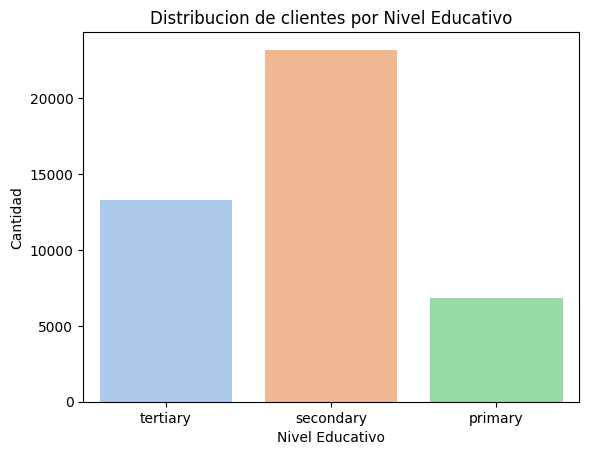

In [58]:
sns.countplot(
    x = analisis_descriptivo['educacion'],
    palette = 'pastel',
)

plt.ylabel('Cantidad')
plt.xlabel('Nivel Educativo')
plt.title('Distribucion de clientes por Nivel Educativo')
plt.show()


In [59]:
analisis_descriptivo.educacion.unique()

array(['tertiary', 'secondary', nan, 'primary'], dtype=object)

In [60]:
analisis_descriptivo.educacion.nunique()

3

## Correlación de variables

In [61]:
pearson = round(analisis.corr(method = 'pearson', numeric_only = True),3)
pearson

,edad,deposito_cliente,dia,duracion,campaña,dias_posteriores,dias_previos
edad,1.000,0.098,-0.009,-0.005,0.005,-0.024,0.001
deposito_cliente,0.098,1.000,0.005,0.022,-0.015,0.003,0.017
dia,-0.009,0.005,1.000,-0.030,0.162,-0.093,-0.052
duracion,-0.005,0.022,-0.030,1.000,-0.085,-0.002,0.001
campaña,0.005,-0.015,0.162,-0.085,1.000,-0.089,-0.033
dias_posteriores,-0.024,0.003,-0.093,-0.002,-0.089,1.000,0.455
dias_previos,0.001,0.017,-0.052,0.001,-0.033,0.455,1.000


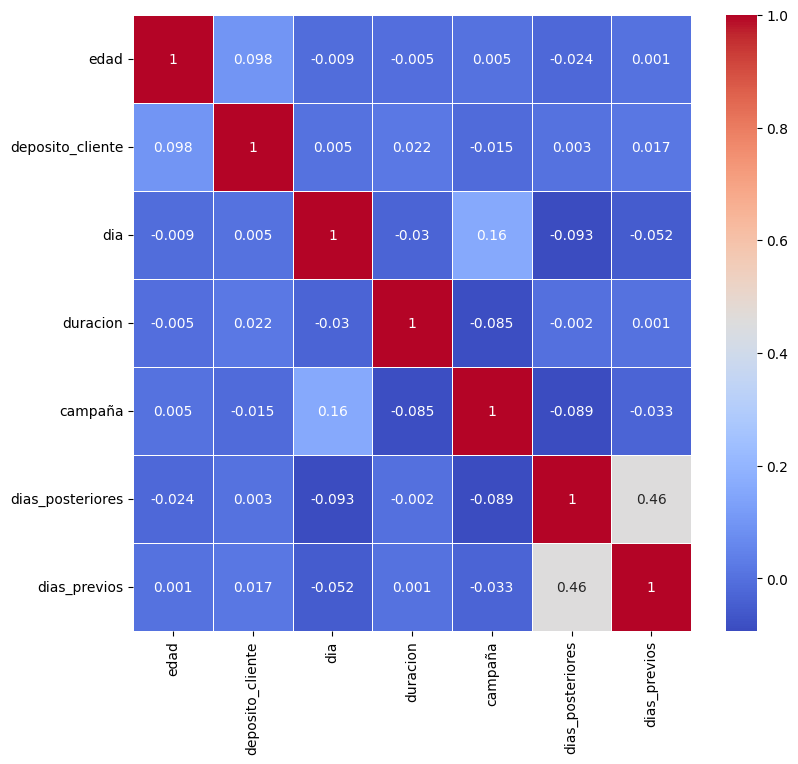

In [66]:
plt.figure(figsize= (9,8))
sns.heatmap(
    pearson,
    annot = True,
    linewidths = 0.5,
    cmap = 'coolwarm'
)
plt.show()

In [70]:
orden = pearson.unstack()
print(orden)

edad              edad                1.000
                  deposito_cliente    0.098
                  dia                -0.009
                  duracion           -0.005
                  campaña             0.005
                  dias_posteriores   -0.024
                  dias_previos        0.001
deposito_cliente  edad                0.098
                  deposito_cliente    1.000
                  dia                 0.005
                  duracion            0.022
                  campaña            -0.015
                  dias_posteriores    0.003
                  dias_previos        0.017
dia               edad               -0.009
                  deposito_cliente    0.005
                  dia                 1.000
                  duracion           -0.030
                  campaña             0.162
                  dias_posteriores   -0.093
                  dias_previos       -0.052
duracion          edad               -0.005
                  deposito_clien

In [71]:
orden.sort_values()

dia               dias_posteriores   -0.093
dias_posteriores  dia                -0.093
                  campaña            -0.089
campaña           dias_posteriores   -0.089
duracion          campaña            -0.085
campaña           duracion           -0.085
dia               dias_previos       -0.052
dias_previos      dia                -0.052
                  campaña            -0.033
campaña           dias_previos       -0.033
duracion          dia                -0.030
dia               duracion           -0.030
edad              dias_posteriores   -0.024
dias_posteriores  edad               -0.024
campaña           deposito_cliente   -0.015
deposito_cliente  campaña            -0.015
edad              dia                -0.009
dia               edad               -0.009
edad              duracion           -0.005
duracion          edad               -0.005
dias_posteriores  duracion           -0.002
duracion          dias_posteriores   -0.002
                  dias_previos  

In [72]:
negativos = orden[orden < 0]
negativos

edad              dia                -0.009
                  duracion           -0.005
                  dias_posteriores   -0.024
deposito_cliente  campaña            -0.015
dia               edad               -0.009
                  duracion           -0.030
                  dias_posteriores   -0.093
                  dias_previos       -0.052
duracion          edad               -0.005
                  dia                -0.030
                  campaña            -0.085
                  dias_posteriores   -0.002
campaña           deposito_cliente   -0.015
                  duracion           -0.085
                  dias_posteriores   -0.089
                  dias_previos       -0.033
dias_posteriores  edad               -0.024
                  dia                -0.093
                  duracion           -0.002
                  campaña            -0.089
dias_previos      dia                -0.052
                  campaña            -0.033
dtype: float64

## Graficos de variables

# **División del conjunto de datos**

In [ ]:
y = analisis['y'] #se define variable objetivo
X = analisis.drop(columns=['y']) #se define conjunto de analisis

# **Preprocesamiento**

## Imputación de valores faltantes

## Codificación de variables no numéricas